In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt  
import pandas as pd


In [ ]:
df = pd.read_csv('unsw_egitim.csv')

df.drop("service", axis='columns')
df.drop("proto", axis='columns')
df.drop("state", axis='columns')
df.drop("attack_cat", axis='columns')
l2 = LabelEncoder()
label1 = l2.fit_transform(df['service'])
df["service"] = label1
label2 = l2.fit_transform(df['proto'])
df["proto"] = label2
label3 = l2.fit_transform(df['state'])
df["state"] = label3
label4 = l2.fit_transform(df['attack_cat'])
df["attack_cat"] = label4
Egitim = df
Egitim.pop("id")
print(Egitim)

             dur  proto  service  ...  is_sm_ips_ports  attack_cat  label
0       0.121478    113        0  ...                0           6      0
1       0.649902    113        0  ...                0           6      0
2       1.623129    113        0  ...                0           6      0
3       1.681642    113        3  ...                0           6      0
4       0.449454    113        0  ...                0           6      0
...          ...    ...      ...  ...              ...         ...    ...
175336  0.000009    119        2  ...                0           5      1
175337  0.505762    113        0  ...                0           8      1
175338  0.000009    119        2  ...                0           5      1
175339  0.000009    119        2  ...                0           5      1
175340  0.000009    119        2  ...                0           5      1

[175341 rows x 44 columns]


In [ ]:
veri = Egitim.values
X = veri[:,0:43]
Y = veri[:,43]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, random_state = 0)

In [ ]:
minMaxScaler = MinMaxScaler()
minMaxScaler.fit(x_train)
x_train_norm = minMaxScaler.transform(x_train)
x_test_norm = minMaxScaler.transform(x_test)

Minimum error:- 0.0013687432275725719 at K = 0


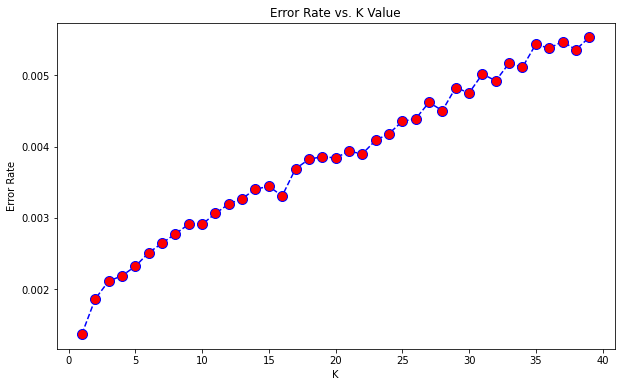

In [ ]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(x_train_norm,y_train)
 pred_i = knn.predict(x_test_norm)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.9986312567724275 at K = 0


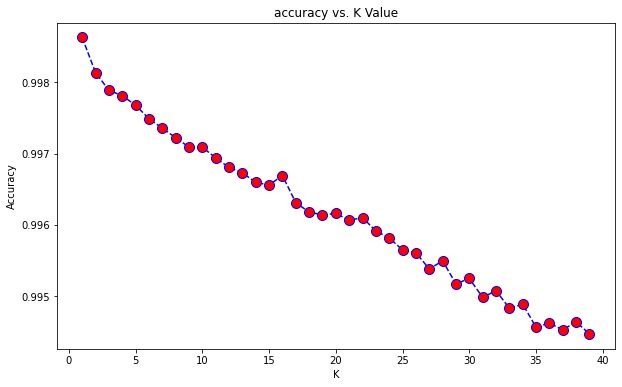

In [ ]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(x_train_norm,y_train)
    yhat = neigh.predict(x_test_norm)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))